# Práctica 9: análisis de asociación

Las reglas de asociación permiten encontrar patrones comunes en los elementos de grandes conjuntos de datos. Una de las principales aplicaciones de esta técnica es el análisis de la cesta de la compra (market-basket analysis). Mediante el cual se pude identificar los productos que se compra de forma conjunta en una tienda.

In [1]:
#Importamos librerías

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
#Cargamos dataset
file = "muertes_accidentales_droga.csv"
df = pd.read_csv(file,encoding="utf-8")
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


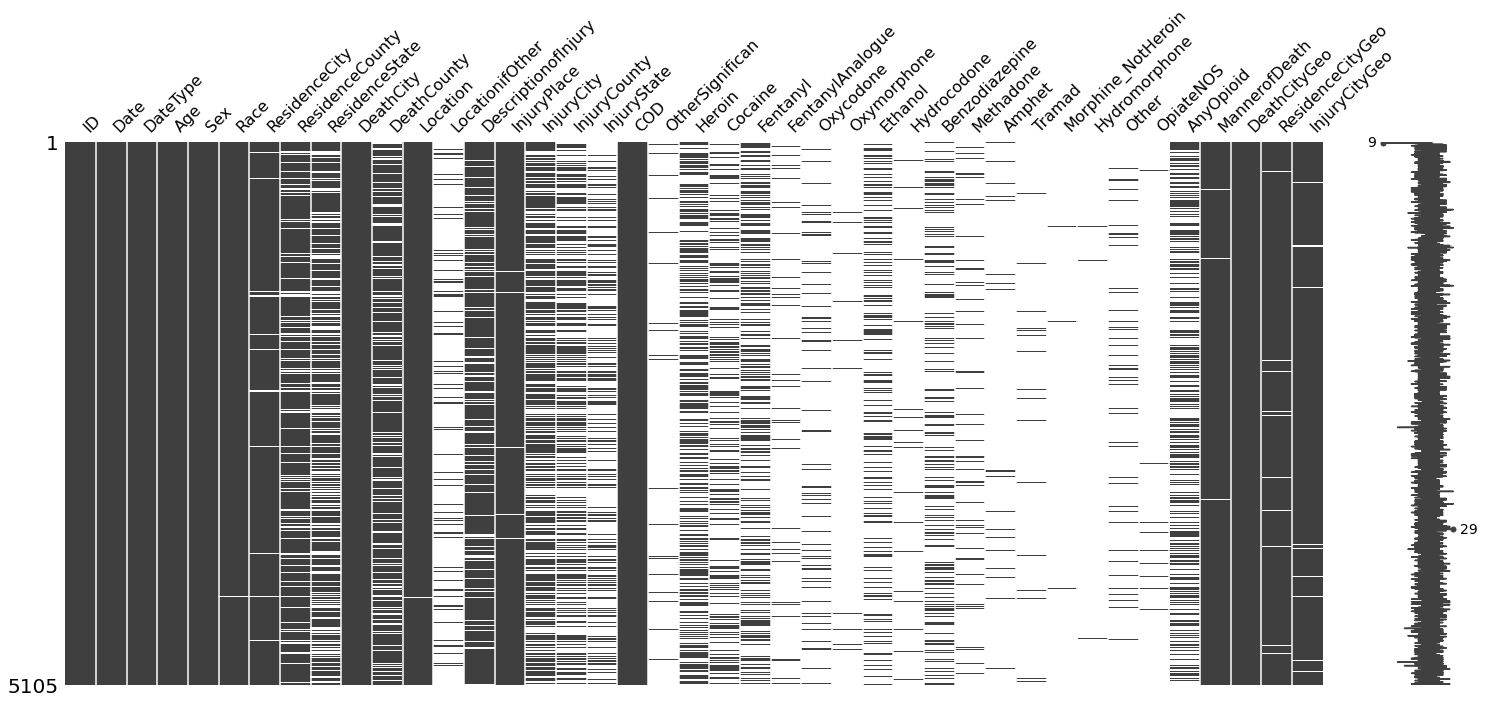

In [3]:
#Visualizamos valores faltantes
msno.matrix(df)

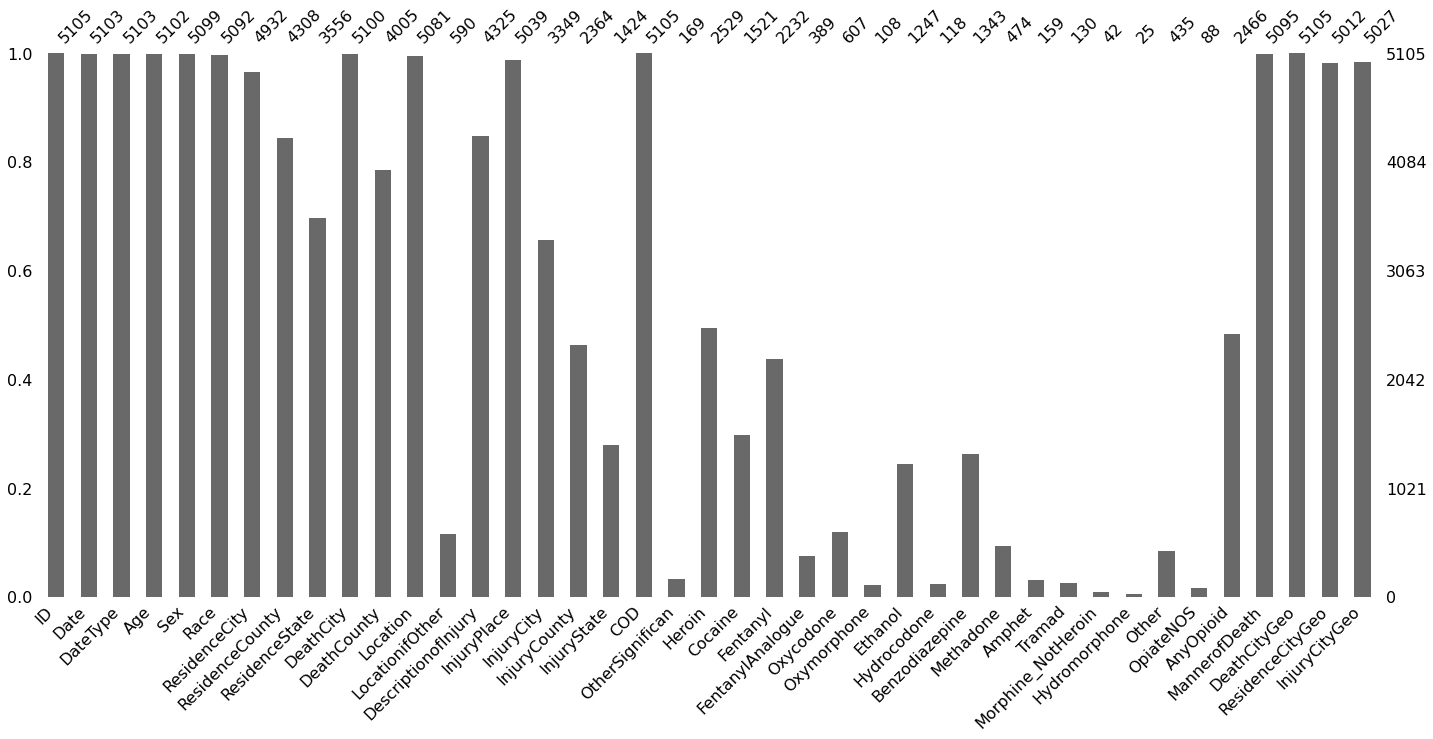

In [4]:
msno.bar(df)

In [12]:
items = (df['Location'].unique())
items

array([nan, 'Hospital', 'Residence', 'Other', 'Nursing Home',
       'Convalescent Home', 'Hospice'], dtype=object)

### Preprocesamiento
El algoritmo apriori, dado por la librería mlxtend, requiere un dataframe que tenga valores en un dominio [0, 1] o [Verdadero, Falso]. Como los datos actualmente son categóricos, entonces necesitamos un Hot Encode de los datos.

In [13]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [14]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Hospital,Other,Residence,Hospice,Nursing Home,Convalescent Home,NaN
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,1,0,0,0,1
4,1,1,0,0,0,0,1


### Aplicando Apriori
Las reglas de asociación encuentran todos los conjuntos de artículos (itemsets) que tienen un soporte mayor que el soporte mínimo (umbral); entonces las reglas deseadas deben tener una confianza mayor que la confianza mínima. El levantamiento de una regla es la relación entre el soporte observado y el esperado si X e Y fueran independientes.

La salida es un dataframe con el soporte de cada conjunto de elementos.

In [15]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 6 combinations | Sampling itemset size 2


,support,itemsets
0,0.318511,(Hospital)
1,0.738296,(Residence)
2,1.000000,(nan)
3,0.318511,"(nan, Hospital)"
4,0.738296,"(nan, Residence)"


In [16]:
freq_items.itemsets.unique()

array([frozenset({'Hospital'}), frozenset({'Residence'}),
       frozenset({nan}), frozenset({nan, 'Hospital'}),
       frozenset({nan, 'Residence'})], dtype=object)

### Reglas de la Asociación
Las reglas de asociación consisten en un antecedente (if) y un consecuente (then). La medida de estas reglas de asociación pueden ser confidence, lift, support, leverage y conviction.

Reglas de la Asociación
Las reglas de asociación consisten en un antecedente (if) y un consecuente (then). La medida de estas reglas de asociación pueden ser confidence, lift, support, leverage y conviction.

In [17]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hospital),(nan),0.318511,1.000000,0.318511,1.000000,1.0,0.0,inf
1,(nan),(Residence),1.000000,0.738296,0.738296,0.738296,1.0,0.0,1.0
2,(Residence),(nan),0.738296,1.000000,0.738296,1.000000,1.0,0.0,inf
